# Customer Segmentation Analysis (python)

###          Background Problem
Mall management wants to understand the different types of customers who visit the mall. Without insights into customer demographics and spending habits, marketing campaigns and mall services cannot be tailored effectively to the diverse needs and preferences of shoppers.

**Key Question**

How can customer segmentation based on demographics and spending behavior enhance targeted marketing and improve service offerings?







**Data Exploration**

Exploring the data to understand the distribution of variables and detect any potential anomalies or outliers.

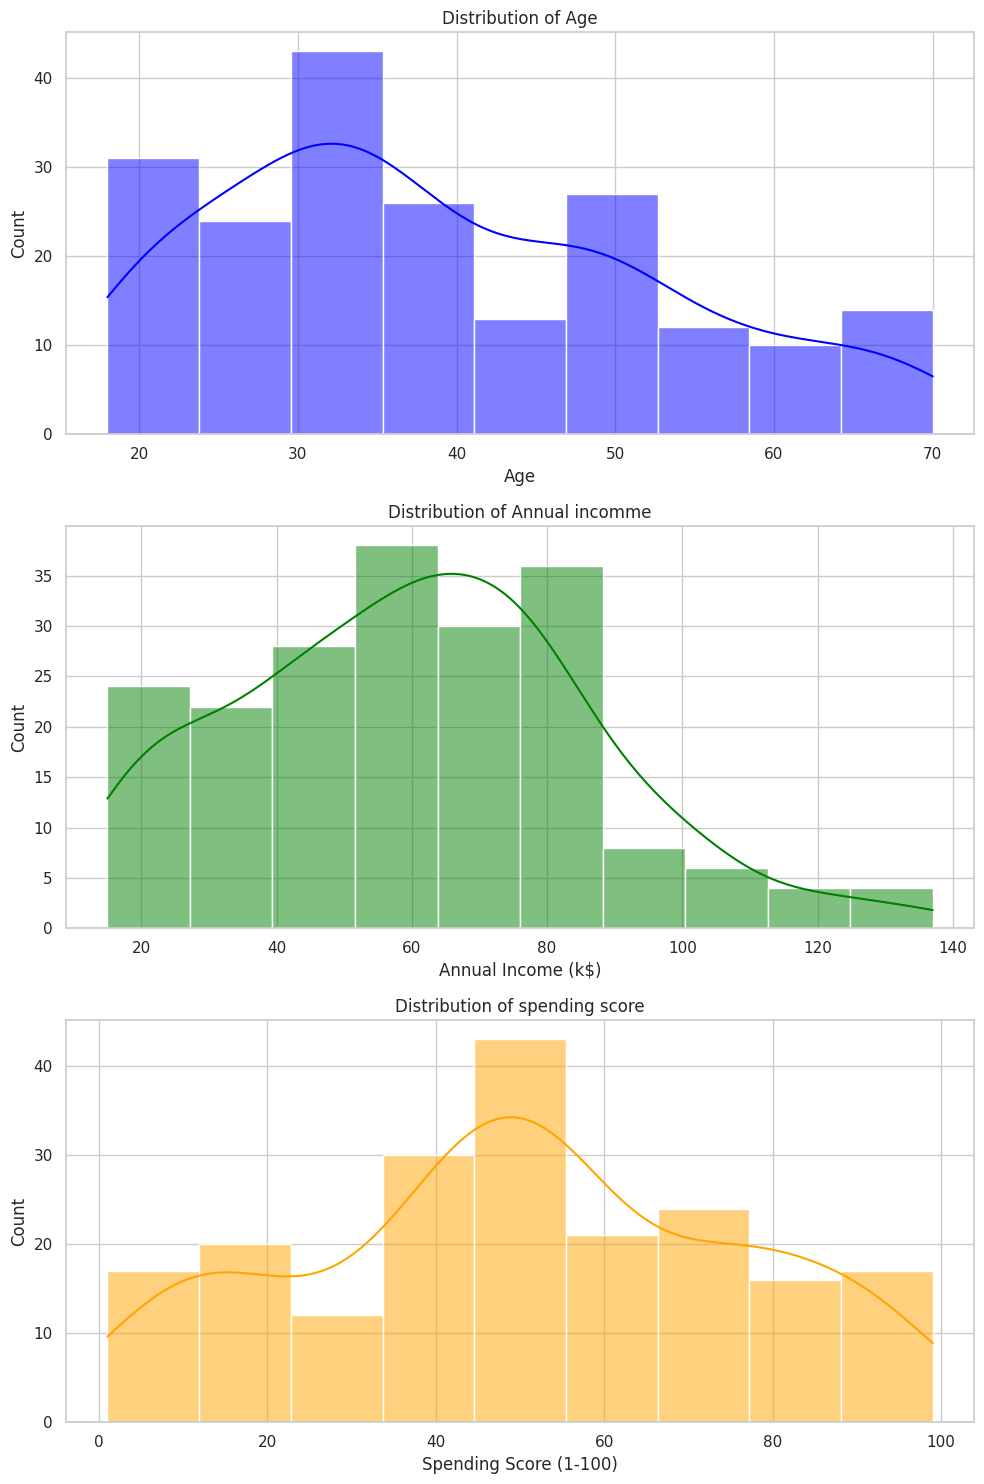

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data
data= 'Mall_Customers.csv'
customer_data= pd.read_csv(data)

# seting up visualiztion style
sns.set(style="whitegrid")

# creating visualization to understand the data
fig, ax=plt.subplots(3,1, figsize=(10,15))

#plotting distribution of numerical data on histogram

sns.histplot(customer_data['Age'], kde= 'True', ax=ax[0], color='blue')
ax[0].set_title('Distribution of Age')

sns.histplot(customer_data['Annual Income (k$)'], kde= 'True', ax=ax[1], color='green')
ax[1].set_title('Distribution of Annual incomme')


sns.histplot(customer_data['Spending Score (1-100)'], kde= 'True', ax=ax[2], color='orange')
ax[2].set_title('Distribution of spending score')

plt.tight_layout()
plt.show()

**Data Preprocessing**

Preparing the data for clustering by encoding categorical variables and scaling numerical data to ensure all features contribute equally to the analysis.

In [ ]:
# import libraries for preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

    # encoding gender to transform it from categorical to numerical format
encoder = LabelEncoder()
customer_data['Gender']= encoder.fit_transform(customer_data['Gender'])

# Selecting features to be included into clustering
features = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]


# scalling the features to have a mean of zero and standard deviation of one

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

**Segmentation Modeling**

Determining the optimal number of clusters for segmentation using the silhouette method and apply K-means clustering.

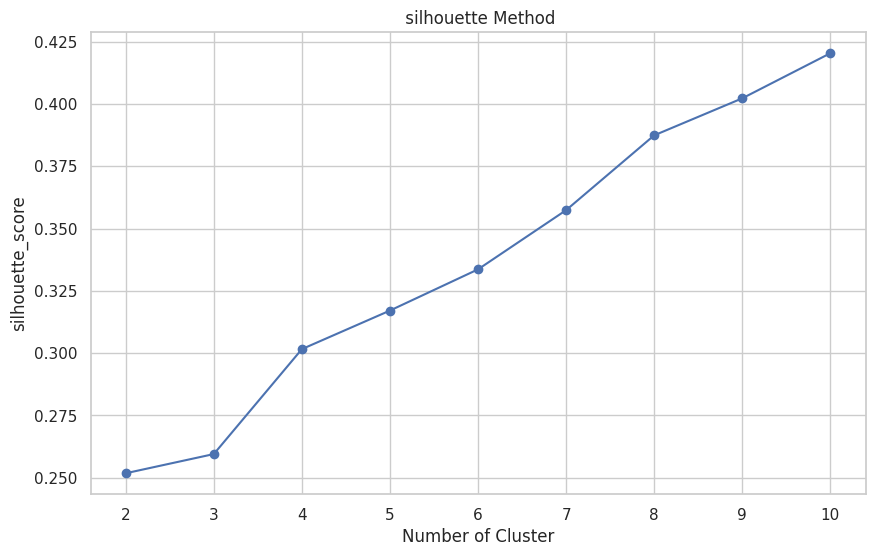

In [ ]:
# importing thrr k means for clustering algorithm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#calculating the inertia values for differnt number of clusters
silhouette_scores =[]
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# ploting the inertia values to observe the elbow which suggest the optimal cluster number

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker= 'o')
plt.title(' silhouette Method')
plt.xlabel( 'Number of Cluster')
plt.ylabel('silhouette_score')
plt.grid(True)
plt.show()

### **Clustering and Analysis**

Perform clustering using the optimal number of 5  clusters Which is the most manageable number determined previously and analyze the resulting segments.

In [ ]:
# Applying k-means clustering using the optimal number of clusters

kmeans= KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)

## adding clusters column to the original data

customer_data['clusters']= cluster_labels

# Analyzing the mean value of each cluster to understand their characteristics
clustered_data= customer_data.groupby('clusters').mean()
pd.DataFrame(clustered_data)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
clusters,,,,,
0,102.854545,0.000000,28.345455,60.800000,68.654545
1,103.375000,1.000000,28.250000,62.000000,71.675000
2,66.651163,0.000000,48.720930,46.186047,39.674419
3,72.612903,1.000000,55.903226,48.774194,38.806452
4,167.451613,0.548387,40.419355,90.000000,15.741935


## Visualization of the clusters

Text(0.5, 1.0, 'Age vs. Annual income by cluster')

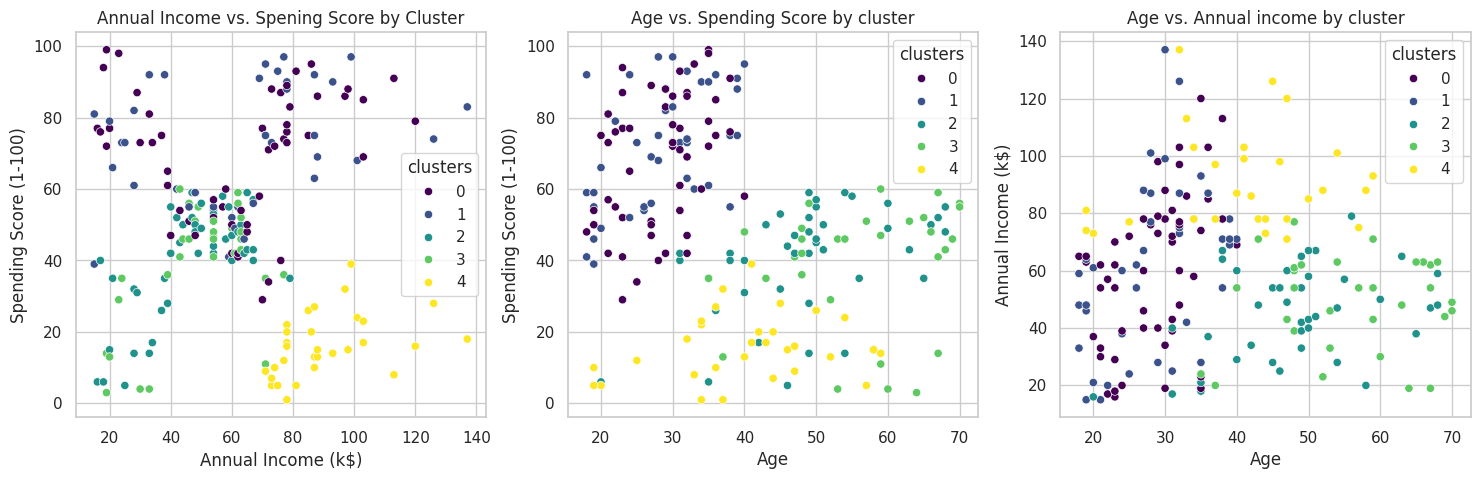

In [ ]:
fig, ax= plt.subplots(1, 3, figsize =(18, 5))

sns.scatterplot(data= customer_data, x ="Annual Income (k$)", y = "Spending Score (1-100)", hue= "clusters", palette ="viridis", ax=ax[0])
ax[0].set_title( "Annual Income vs. Spening Score by Cluster")

sns.scatterplot(data= customer_data, x ="Age", y = "Spending Score (1-100)", hue= "clusters", palette ="viridis", ax=ax[1])
ax[1].set_title("Age vs. Spending Score by cluster")


sns.scatterplot(data= customer_data, x ="Age", y = "Annual Income (k$)", hue= "clusters", palette ="viridis", ax=ax[2])
ax[2].set_title("Age vs. Annual income by cluster")

# ....................**Findngs and Recommendations**.............,
The recommendations are organized according to each cluster as depicted in our analytical visuals, and are as follows:

## -----------------Annual Income vs. Spending Score by Cluster---------

***Targeted Marketing***: The firm should focus on clusters with high spending scores by offering premium product selections and luxury services. Initiatives such as exclusive deals and loyalty programs that encourage further spending could be particularly effective for the cluster with high income and high spending scores.

***Customer Retention:*** For those clusters with moderate to high income but lower spending scores, the firm should implement retention strategies like personalized discounts or value-driven marketing that are designed to boost engagement and spending.

## ---------------------- Age vs. Spending Score by Cluster-----------------

***Product Placement and Promotions:***  The firm should adjust its product placement and promotions based on the age and spending behavior of different clusters. Younger clusters with high spending scores would likely respond well to trendy products and aggressive digital marketing campaigns. Conversely, older clusters may appreciate more traditional marketing approaches and offerings that emphasize value and quality.

***Service Customization:*** Services should be customized to meet the age-specific needs and preferences. For older customers, this might mean a focus on higher service quality and more direct interaction. Younger demographics, meanwhile, might prioritize speed and digital interaction.

## ---------------------- Age vs. Annual Income by Cluster--------------

***Financial Products and Services:*** The firm should offer financial services like investment advice or retirement planning to clusters with older age and higher income. Conversely, for younger customers with lower income, more focus should be placed on credit services or budgeting tools.

***Career and Lifestyle Services:*** Career advancement workshops can be targeted at younger, lower-income groups, while older, higher-income groups might be offered leisure and luxury services.
